In [27]:
import math
from qiskit import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
from qiskit.circuit.library import QFT
%matplotlib inline

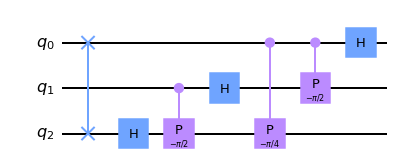

In [33]:
qft_gate_inv = QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=False, name='qft_gate_inv')
qft_gate_inverse = qft_gate_inv.to_gate()

qft_gate_inv.draw(output="mpl")

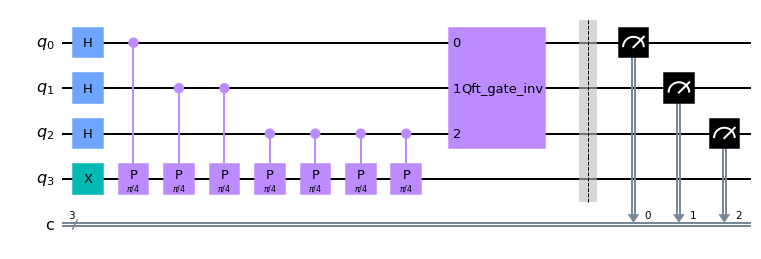

In [34]:
angle = math.pi/4 # The phase angle we wish to encode
actual_phase = angle/(2*math.pi) # This is the actual phase rotation ie 0.5 would be half a rotation. Our expected rotation will be 0.125  

qc = QuantumCircuit(4,3)

qc.h(range(3))
qc.x(3)

qc.cp(angle, 0, 3);

qc.cp(angle, 1, 3);
qc.cp(angle, 1, 3);

qc.cp(angle, 2, 3);
qc.cp(angle, 2, 3);
qc.cp(angle, 2, 3);
qc.cp(angle, 2, 3);

qc.append(qft_gate_inverse, range(3))
qc.barrier()
qc.measure(range(3), range(3))

qc.draw(output="mpl")

In [35]:
# simulators
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")

In [38]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1).result().get_counts()

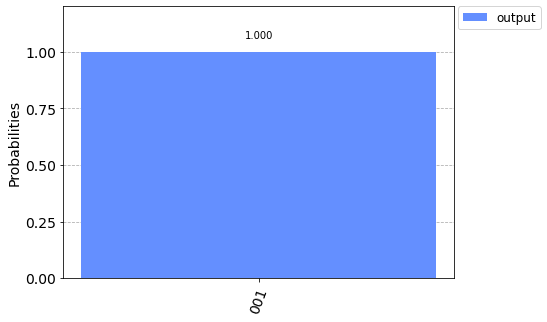

In [39]:
plot_histogram([sim_counts], legend=['output'])

In [40]:
print('\n')
print("Phase estimation output")
print("-----------------------\n")

a = sim_counts.most_frequent()

print('Most frequent measurement: ', a,'\n')

bin_a = int(a,2) # Converts the binary value to an integer
phase = bin_a/(2**3)# The calculation used to estimate the phase

print('Actual phase is: ', actual_phase)
print('Estimated phase is: ', phase)



Phase estimation output
-----------------------

Most frequent measurement:  001 

Actual phase is:  0.125
Estimated phase is:  0.125


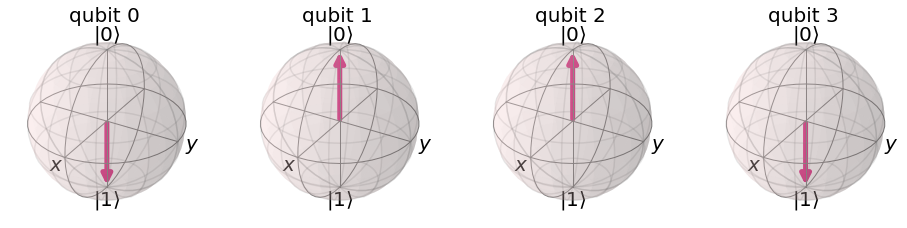

In [41]:
plot_bloch_multivector(sim_state_vector)

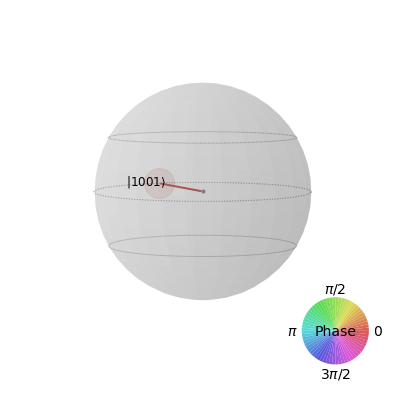

In [42]:
plot_state_qsphere(sim_state_vector)

In [43]:
import numpy as np
from qiskit import QuantumCircuit
import kaleidoscope.qiskit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
from kaleidoscope import qsphere, bloch_sphere

In [44]:
bloch_sphere(qc.statevector())

In [45]:
qsphere(qc.statevector())